In [101]:
import pandas as pd
import numpy as np
import math
import pylab
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from skimage import io, img_as_float
from tqdm import tqdm_notebook as tqdm

import sys
sys.path.append("..")

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [75]:
# Реализуем метрику PSNR

def psnr(true_image, model_image):
    return round(10 * math.log10(float(1)/np.mean((np.array(true_image) - np.array(model_image))**2)), 3)

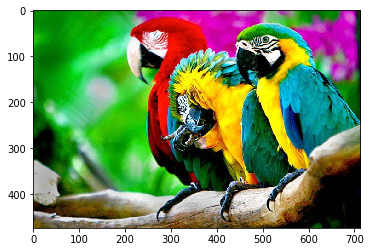

In [76]:
image = io.imread('parrots.jpg')
pylab.imshow(image)

In [77]:
float_image = img_as_float(image)
w, h, d = image.shape

In [78]:
data = pd.DataFrame(data=np.reshape(float_image, (w*h, d)), columns=['R', 'G', 'B'])

In [79]:
X = data.copy()

In [81]:
%%time

# Обучим кластеризацию

model = KMeans(init='k-means++', random_state=241)
X['cluster_labels'] = model.fit_predict(X)

CPU times: user 8.3 s, sys: 729 ms, total: 9.03 s
Wall time: 6.07 s


In [82]:
mean_rgb = X.groupby('cluster_labels').mean().values
median_rgb = X.groupby('cluster_labels').median().values

In [83]:
X.head()

,R,G,B,cluster_labels
0,0.015686,0.494118,0.019608,2
1,0.007843,0.494118,0.007843,2
2,0.007843,0.494118,0.007843,2
3,0.007843,0.494118,0.007843,2
4,0.007843,0.501961,0.011765,2


In [86]:
mean_image = np.reshape(pre_mean_image, (w, h, d))
io.imsave('images/1.jpg', mean_image)

/Users/sharafutdinovruslan/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [87]:
median_image = np.reshape([median_rgb[cluster] for cluster in X['cluster_labels']], (w, h, d))
io.imsave('images/2.jpg', median_image)

/Users/sharafutdinovruslan/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [88]:
print('PSNR MEAN = {0}'.format(psnr(float_image, mean_image)))
print('PSNR MEDIAN = {0}'.format(psnr(float_image, median_image)))

PSNR MEAN = 18.468
PSNR MEDIAN = 18.189


In [91]:
X.drop('cluster_labels', axis=1, inplace=True)

In [98]:
min_clusters = 0
mean_rgb_list, median_rgb_list = [], []

In [99]:
for n_clusters in tqdm(range(2, 21)):
    model = KMeans(init='k-means++', random_state=241, n_clusters=n_clusters)
    X['cluster_labels'] = model.fit_predict(X)
    mean_rgb, median_rgb = X.groupby('cluster_labels').mean().values, X.groupby('cluster_labels').median().values
    mean_image = np.reshape([mean_rgb[cluster] for cluster in X['cluster_labels']], (w, h, d))
    median_image = np.reshape([median_rgb[cluster] for cluster in X['cluster_labels']], (w, h, d))
    if (min_clusters == 0) & (psnr(float_image, mean_image) > 20 or psnr(float_image, mean_image) > 20):
        min_clusters = n_clusters
        print('MIN CLISTERS = {0}'.format(min_clusters))
    io.imsave('images/mean' + str(n_clusters) + 'clusters.jpg', mean_image)
    io.imsave('images/median' + str(n_clusters) + 'clusters.jpg', median_image)
    mean_rgb_list.append(psnr(float_image, mean_image))
    median_rgb_list.append(psnr(float_image, median_image))
    X.drop('cluster_labels', axis=1, inplace=True)

/Users/sharafutdinovruslan/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


MIN CLISTERS = 11



Text(0.5,1,'PSNR')

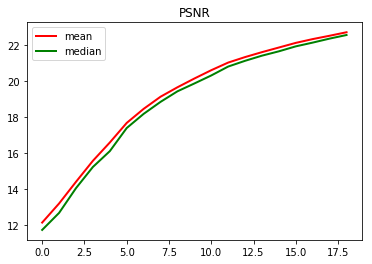

In [102]:
plt.figure()
plt.plot(mean_rgb_list, 'r', linewidth=2)
plt.plot(median_rgb_list, 'g', linewidth=2)
plt.legend(['mean', 'median'])
plt.title('PSNR')

In [97]:
# Запись ответа
output1 = open('week6_1.txt', 'w')
print(
    min_clusters,
    file=output1, 
    end='', 
    sep=' '
)
output1.close()